# Task:8-1
#  Name:Rayapati Naga Hema Chandrika Sravani
#  Reg Id:SIRSS1210

# Gradient Descent :

Gradient Descent is the process of minimizing a function by following the gradients of the cost function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LinearRegression:
    def __init__(self,print_cost=True):
        self.learning_rate = 0.01
        self.print_cost = print_cost
        
    def y_pred(self,X,w):
        return np.dot(w.T,X)
    #dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    def cost(self, yhat, y):
        C = 1 / self.m * np.sum(np.power(yhat - y, 2))
        #Calculating Mean square error
        return C
    
    def gradient_descent(self, w, X, y, yhat):
        gd = 2 / self.m * np.dot(X, (yhat - y).T)
        w = w - self.learning_rate * gd
        return w
    
    def main(self, X, y,total_iterations,k):
        # Add x1 = 1
        ones = np.ones((1, X.shape[1]))
        X = np.append(ones, X, axis=0)
        costs=[]

        self.m = X.shape[1]
        self.n = X.shape[0]

        w = np.zeros((self.n, 1))

        for it in range(total_iterations + 1):
            yhat = self.y_pred(X, w)
            cost = self.cost(yhat, y)
            costs.append(cost)
            if it % k == 0 and self.print_cost:
                print(f"Cost at iteration {it} is {cost}")

            w = self.gradient_descent(w, X, y, yhat)
            
        print('Slope:',w[1,0])
        print('Intercept:',w[0,0])
        return (w,costs)

# Training model on ndarray

In [3]:
if __name__ == "__main__":
    X = np.random.rand(1, 500)
    y = 3 * X + 5 + np.random.randn(1, 500) * 0.1
    regression = LinearRegression()
    w,c = regression.main(X,y,1000,100) #c for costs

Cost at iteration 0 is 43.35869040719788
Cost at iteration 100 is 0.25812461477922355
Cost at iteration 200 is 0.013115463089096988
Cost at iteration 300 is 0.011289479589177387
Cost at iteration 400 is 0.01093846605272085
Cost at iteration 500 is 0.010670545822029013
Cost at iteration 600 is 0.010461432124444722
Cost at iteration 700 is 0.010298190576481379
Cost at iteration 800 is 0.01017075829894534
Cost at iteration 900 is 0.010071280036816222
Cost at iteration 1000 is 0.009993623693947738
Slope: 2.9242027710251
Intercept: 5.043086241965224


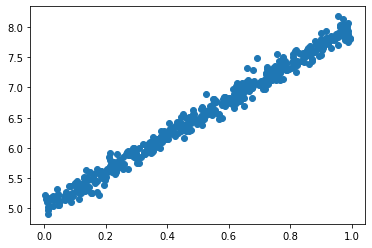

In [4]:
plt.scatter(X,y)

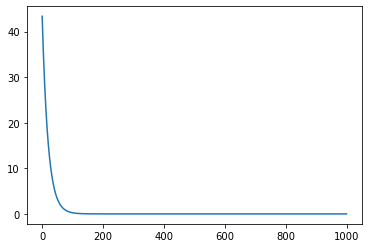

In [5]:
plt.plot(c)

# Training model on data set

In [6]:
data=pd.read_csv("Salary_Data.csv")

In [7]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
data.duplicated().sum()

0

In [9]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,:-1].values

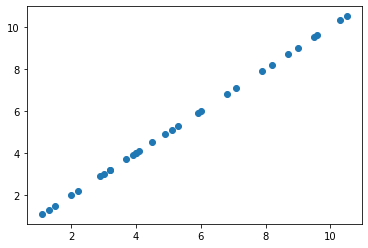

In [10]:
plt.scatter(X,Y)

In [11]:
result,c=regression.main(X,Y,20,2)

Cost at iteration 0 is 1080.5
Cost at iteration 2 is 195713905.35342363
Cost at iteration 4 is 35450192270882.8
Cost at iteration 6 is 6.4211897962649e+18
Cost at iteration 8 is 1.1630875817145377e+24
Cost at iteration 10 is 2.1067321877410586e+29
Cost at iteration 12 is 3.8159813419395153e+34
Cost at iteration 14 is 6.911990848558822e+39
Cost at iteration 16 is 1.25198771192834e+45
Cost at iteration 18 is 2.2677594128273255e+50
Cost at iteration 20 is 4.1076543367554166e+55
Slope: 4.500312105301212e+24
Intercept: 4.0911928230011015e+24


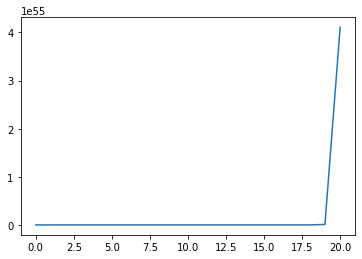

In [12]:
plt.plot(c)